## ML Final Project

**Scenario:** You work at a multinational bank that is aiming to increase it's market share in 
Europe. Recently, it has been noticed that the number of customers using the banking 
services has declined, and the bank is worried that existing customers have stopped 
using them as their main bank. <br> 

As a data scientist, you are tasked with finding out the 
reasons behind customer churn (when a customer stops using them as the main bank) and to predict customer churn. <br> 

The marketing team, 
in particular, is interested in your findings and want to better understand existing 
customer behavior and possibly predict customer churn. Your results will help the 
marketing team to use their budget wisely to target potential churners. To achieve 
this objective, in this exercise, you will import the banking data (Churn_Modelling.csv) 
provided by the bank and do some machine learning to solve their problem.

Data dictionary

- CustomerID: Unique ID of each customer
- CredRate: Credit Score of the customer 
- Geography: Country customer is from 
- Gender
- Age
- Tenure: How long customer has been with bank 
- Prod Number: Number of products customer has with bank 
- HasCrCard: Does customer have credit card
- ActMem: Is customer active member 
- Estimated salary: Annual estimated salary of customer 
- Exited: Whether customer has churned (1 is yes)

### Introduction 

Customer churn is a tendency of customers stop or abandon a brand/product/services. 
In this project, I will build a classification machine learning model to predict whether the customer will churn or not by classifying the instance into 0 (did not exit) and 1 (exit).  

### Importing the Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, plot_confusion_matrix

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


### Loading the Data

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

### Exploring the Data 

In [3]:
dataset.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CredRate         10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           9996 non-null   object 
 4   Age              9994 non-null   float64
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   Prod Number      10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   ActMem           10000 non-null  int64  
 10  EstimatedSalary  9996 non-null   float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


In [5]:
dataset.describe()

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,9994.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9996.000000,10000.000000
mean,1.569094e+07,650.528800,38.925255,5.012800,76485.889288,1.530200,0.70550,0.515100,100074.744083,0.203700
std,7.193619e+04,96.653299,10.489248,2.892174,62397.405202,0.581654,0.45584,0.499797,57515.774555,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,50974.077500,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100168.240000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
dataset.describe(include = ['object'])

,Geography,Gender
count,10000,9996
unique,3,2
top,France,Male
freq,5014,5453


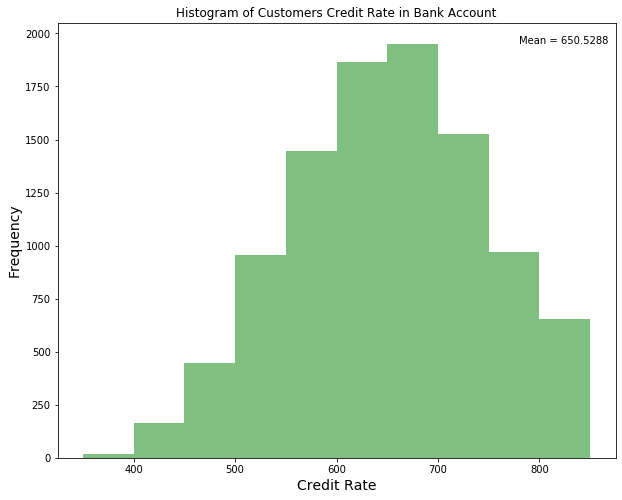

In [7]:
# histogram for credit rate column values
plt.figure(figsize = (10, 8))
plt.hist(dataset['CredRate'], facecolor = 'g', alpha = 0.5)
plt.title('Histogram of Customers Credit Rate in Bank Account')
plt.xlabel('Credit Rate', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.text(780, 1950, 'Mean = ' + str(dataset['CredRate'].mean()))
plt.show()

From the above figure, the Credit Score of the customer is spread between 350 to 850 score and it's average score is 650.

In [8]:
# geography column values count
dataset['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
# gender column values count
dataset['Gender'].value_counts()

Male      5453
Female    4543
Name: Gender, dtype: int64

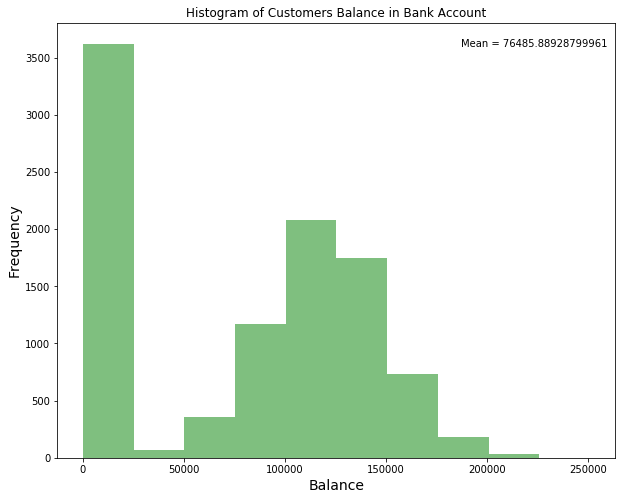

In [10]:
# histogram for balance column values
plt.figure(figsize = (10, 8))
plt.hist(dataset['Balance'], facecolor = 'g', alpha = 0.5)
plt.title('Histogram of Customers Balance in Bank Account')
plt.xlabel('Balance', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.text(187000, 3600, 'Mean = ' + str(dataset['Balance'].mean()))
plt.show()

From the above figure, the Balance is almost spread between 0 to 250000 and the average is around 76500.

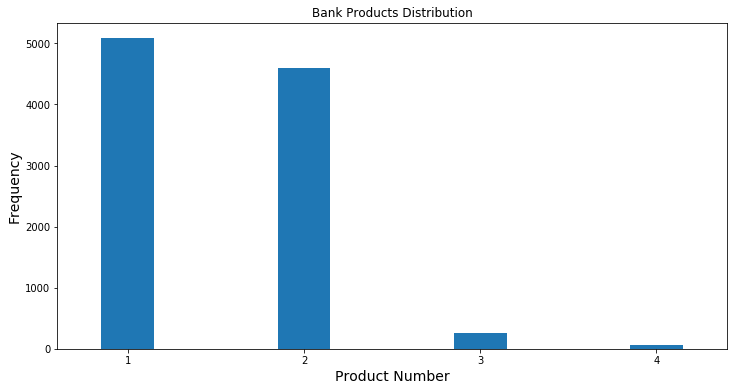

In [11]:
# bar plot for product number column values distribution
plt.figure(figsize = (12, 6))
plt.title('Bank Products Distribution')
plt.xlabel('Product Number', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
dataset['Prod Number'].value_counts().plot(kind = 'bar', width = 0.3, rot = 0)
plt.show()

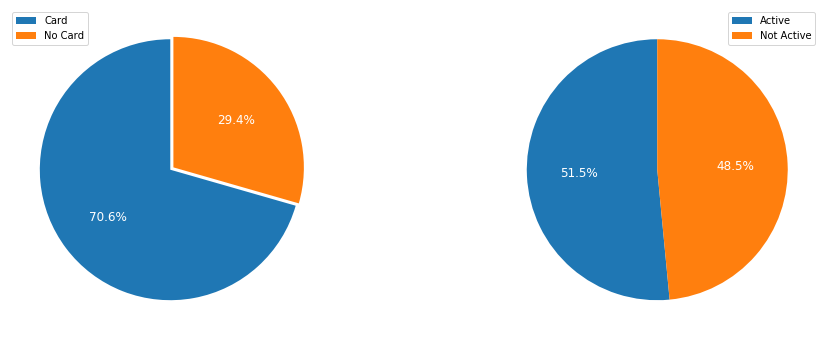

In [12]:
# define the figure and subplots
fig, axs = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(16, 6, forward = True)

# pie chart of 'has credit card' distribution
axs[0].pie(dataset['HasCrCard'].value_counts(), explode = (0, .03), autopct = '%1.1f%%', startangle = 90, 
           textprops = {'color': 'white', 'fontsize': 12})
axs[0].legend(labels = ['Card', 'No Card'], loc = 'best')

# pie chart of 'is active member' distribution
axs[1].pie(dataset['ActMem'].value_counts(), autopct = '%1.1f%%', startangle = 90, 
           textprops = {'color': 'white', 'fontsize': 12})
axs[1].legend(labels = ['Active', 'Not Active'], loc = 'best')

plt.show()

- From the first pie chart, **71%** customers have a credit card and **29%** do not have a credit card.
- From the second pie chart, **51.5%** customers are active members and **48.5%** are not active members.

C:\Users\jinme\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jinme\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


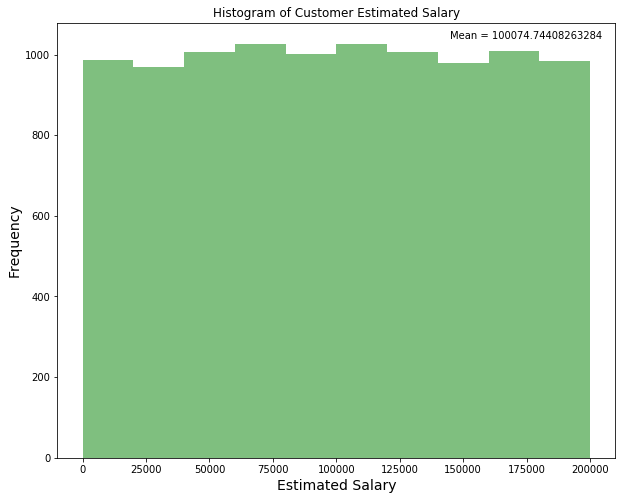

In [13]:
# histogram for estimated salary column values
plt.figure(figsize = (10, 8))
plt.hist(dataset['EstimatedSalary'], facecolor = 'g', alpha = 0.5)
plt.title('Histogram of Customer Estimated Salary')
plt.xlabel('Estimated Salary', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.text(145000, 1040, 'Mean = ' + str(dataset['EstimatedSalary'].mean()))
plt.show()

From the above figure, the **Estimated Salary** is spread between 0 to 200000 and the average is **100000**.

### Class Distribution of Target column.

In [14]:
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

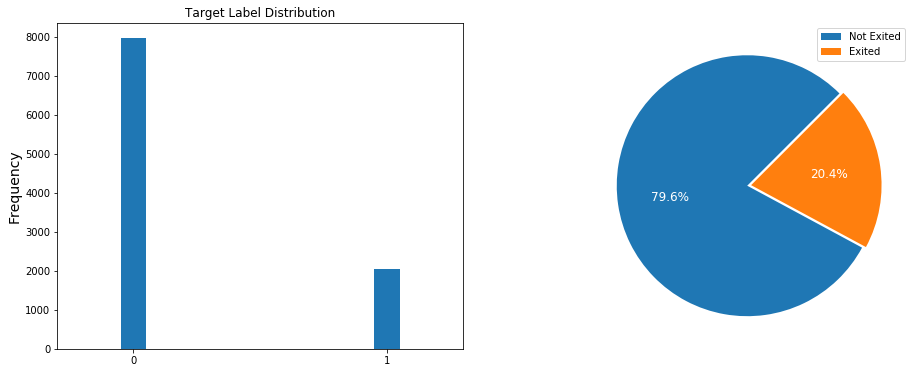

In [15]:
# target label distribution analysis through graphs

# define the figure and subplots
fig, axs = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(16, 6, forward = True)

# bar plot of target label distribution
axs[0].set_title('Target Label Distribution')
axs[0].set_ylabel('Frequency', fontsize = 14)
dataset['Exited'].value_counts().plot(ax = axs[0], kind = 'bar', width = 0.1, rot = 0)

# pie chart of target label distribution
axs[1].pie(dataset['Exited'].value_counts(), explode = (0, .03), autopct = '%1.1f%%', startangle = 45, 
           textprops = {'color': 'white', 'fontsize': 12})
axs[1].legend(labels = ['Not Exited', 'Exited'], loc = 'best')

plt.show()

From the above graphs, 80% of the customers did not churn and 20% had churned.

### Preprocessing the Data 
#### Missing Values Handling
Let's first fill the missing values of **Gender** column. For this we will do the imputation using the mode i.e. each missing value will be replace by the mode of the column. We will replace the null values with the gender **Male** as it is more frequently occured.

In [16]:
dataset['Gender'].fillna(dataset['Gender'].value_counts().index[0], inplace = True)

Now we will fill the missing values of **Age** column. For this we will do the imputation using the median i.e. each missing value will be replace by the median of the column.

In [17]:
dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

In the last, we will fill the missing values of **Estimated Salary** column. For this we will do the imputation using the mean i.e. each missing value will be replace by the mean of the column.

In [18]:
dataset['EstimatedSalary'].fillna(dataset['EstimatedSalary'].mean(), inplace = True)

### Let's separate the features and target column values

In [19]:
# features columns
features = ['CredRate','Geography','Gender','Age','Tenure','Balance','Prod Number','HasCrCard','ActMem','EstimatedSalary']

# target column
target = ['Exited']

# featues values
X = dataset.loc[:, features].values

# target label values
y = dataset.loc[:, target].values

### Categorical Values Handling

Let's first encode the values of Gender column. This column has two categories (Male, Female).The label encoding is applied to assign numeric values.

In [20]:
# label encode
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

Now encode the values of Geography column. This column has three different categories (France, Germany, Spain). We will do this using one hot encoding to represent each category into a separate column. It is preferable to apply one hot encoding for categories greater than two.

In [21]:
# one hot encode
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories = 'auto'), [1])], remainder = 'passthrough')
X = ct.fit_transform(X)

# drop first (zero index) column to avoid dummy variable trap
X = X[:, 1:]

In [22]:
# Head of the dataset after preprocessing
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,619,0,42,2,0,1,1,1,101349
1,0,1,608,0,41,1,83807.9,1,0,1,112543
2,0,0,502,0,42,8,159661,3,1,0,113932
3,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,1,850,0,43,2,125511,1,1,1,79084.1


### Data Split into Train and Test Set
Let's split the data into 70% for train and 30% for test set.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Data Scaling
Standardize the independent features present in the data in a fixed range.

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Machine Learning Modelling

In [25]:
# models
models = ['Naive Bayes', 'Decision Tree', 'Random Forest', 'SVM']

# list to store accuracy values of all models
accuracy_values = []

#### Naive Bayes
The first machine learning model that I build is Naive Bayes. It is a probabilistic machine learning model which is used for classification task. It is based on **Bayes Theorem** with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. It is easy and fast to predict the class of test data set. It performs well in case of categorical input variables as in our case we have two categorical input variables (Geography and Gender).

In [26]:
# training the model
model_1 = GaussianNB()
model_1.fit(X_train, y_train)

# testing the model 
y_pred = model_1.predict(X_test)

# calculate the accuracy on test data
accuracy_values.append(round(accuracy_score(y_test, y_pred) * 100, 2))

C:\Users\jinme\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Decision Tree
The 2nd model that I build is the Decision Tree. Decision tree is one of the supervised machine learning algorithms. This algorithm can be used for regression and classification problems. It is mostly used for classification problems. A decision tree follows a set of if-then-else decision rules to visualize the data and classify it according to the conditions. <br><br>  Decision tree builds classification or regression models in the form of a tree structure. It breaks down a data set into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches. Leaf node represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

In [27]:
# training the model
model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)

# testing the model 
y_pred = model_2.predict(X_test)

# calculate the accuracy on test data
accuracy_values.append(round(accuracy_score(y_test, y_pred) * 100, 2))

#### Random Forest
And the next model that I build is the Random Forest. It is an extension to the decision tree. Random forest builds multiple decision trees each based on a random sample of the training data and merges them together to get a more accurate and stable prediction by means of voting. It can handle thousands of input variables without variable deletion which in our case will also help as we have multiple input attributes.

In [28]:
# training the model
model_3 = RandomForestClassifier()
model_3.fit(X_train, y_train)

# testing the model 
y_pred = model_3.predict(X_test)

# calculate the accuracy on test data
accuracy_values.append(round(accuracy_score(y_test, y_pred) * 100, 2))

C:\Users\jinme\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


#### Support Vector Machine
And the last model that I build is the Support Vector Machines (SVM). In the SVM algorithm, each data item is plot as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, perform classification by finding the hyper-plane that differentiates the two classes very well. It works really well with a clear margin of separation. It is effective in high dimensional spaces which in our case will also help as we have multiple input attributes. <br><br> SVM has different types of kernels like linear, rbf and poly. I have used radial basis function (rbf) kernel as our problem is non-linear.

In [29]:
# training the model
model_4 = SVC(kernel = 'rbf')
model_4.fit(X_train, y_train)

# testing the model 
y_pred = model_4.predict(X_test)

# calculate the accuracy on test data
accuracy_values.append(round(accuracy_score(y_test, y_pred) * 100, 2))

C:\Users\jinme\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Models Evaluation
Following evaluation metrics are calculated to evaluate the models: <br>
1) Accuracy Score <br>
2) Confusion Matrix <br><br>
Let's have a look at the results.

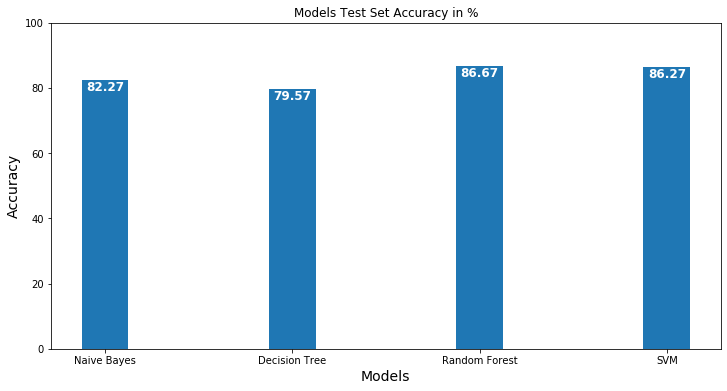

In [30]:
# accuracy graph
plt.figure(figsize = (12, 6))
bars = plt.bar(models, accuracy_values, width = 0.25)
plt.title('Models Test Set Accuracy in %')
plt.xlabel('Models', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.ylim(0, 100)

for bar, accuracy in zip(bars, accuracy_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height-4, '%.2f' % float(accuracy), ha = 'center', 
             color = 'white', va = 'bottom', fontweight = 'bold', fontsize = 12)    
plt.show()

From the above graph, the Random Forest model has more accuracy than the other 3 models.

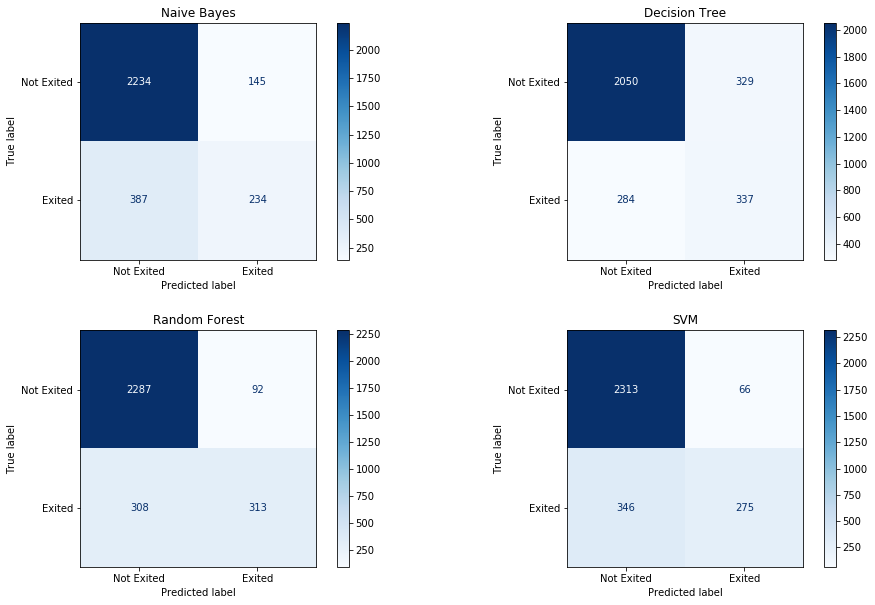

In [31]:
# confusion matrix plot
 
# define the figure and subplots
fig, axs = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(16, 10, forward = True)
plt.subplots_adjust(hspace = 0.3)

# labels
labels = ['Not Exited', 'Exited']

axs[0][0].set_title('Naive Bayes')
plot_confusion_matrix(model_1, X_test, y_test, display_labels=labels, values_format='d', cmap=plt.cm.Blues, ax=axs[0][0])

axs[0][1].set_title('Decision Tree')
plot_confusion_matrix(model_2, X_test, y_test, display_labels=labels, values_format='d', cmap=plt.cm.Blues, ax=axs[0][1])

axs[1][0].set_title('Random Forest')
plot_confusion_matrix(model_3, X_test, y_test, display_labels=labels, values_format='d', cmap=plt.cm.Blues, ax=axs[1][0])

axs[1][1].set_title('SVM')
plot_confusion_matrix(model_4, X_test, y_test, display_labels=labels, values_format='d', cmap=plt.cm.Blues, ax=axs[1][1])

# display the figure
plt.show()

Correct classification and misclassification of above models can be described as:
- **Naive Bayes:** 2234 'not exited' and 234 'exited' instances are classified correctly whereas 145 'not exited' are wrongly classified as 'exited' and 387 'exited' are wrongly classified as 'not exited'.
- **Decision Tree:** 2050 'not exited' and 337 'exited' instances are classified correctly whereas 329 'not exited' are wrongly classified as 'exited' and 284 'exited' are wrongly classified as 'not exited'.
- **Random Forest:** 2287 'not exited' and 313 'exited' instances are classified correctly whereas 92 'not exited' are wrongly classified as 'exited' and 308 'exited' are wrongly classified as 'not exited'.
- **SVM:** 2313 'not exited' and 275 'exited' instances are classified correctly whereas 66 'not exited' are wrongly classified as 'exited' and 346 'exited' are wrongly classified as 'not exited'.

So we can see that Random Forest is the model which has more correctly classified the 'not exited' and 'exited' labels overall than all others. And Decision Tree is the model which has more correctly classified the 'exited' label than the others whereas SVM is the model which has more correctly classified the 'not exited' label than all others. <br><br> If our main focus is to identify those customers which have churn then decision tree can be a good choice in that case but if we want to take care for both classes (exited, not exited) then Random Forest would be the model to go with.

### Conclusion
In conclusion, we can say that the models that we have developed are good baseline models to be used for customer churn modeling. We can apply more techniques like feature selection, dimensionality reduction, parameter tuning etc. to increase the performance of the models. In future, I would like to apply deep learning algorithms on this to see the difference between these and deep learning models.